# Subsidence Example

Total land subsidence and subsidence for each geologic layer is calculated in this Jupyter Notebook.  The workflow is as follows:

1. import packages
2. give initial inputs (number of layers, layer thicknesses, hydraulic head values, and skeletal specific storage)
3. plot initial hydrograph 
4. initiate model object
5. calculate pore-fluid pressure values
6. calculate change in thickness values and new thickness of each layer
7. plot each layer's compaction
8. plot total subsidence



#### TODO: 
inputs to model, nlay must have one less than z, current values all made up - next steps to input real data


In [1]:
import subpydence as sub
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nlay = 3
z = [255, 200, 150, 0]
h = np.array([[305, 298, 290, 270, 268, 265],
              [250,248, 247,243,240, 239.5],
              [180,179,178.5,177,175, 173]])
Ssk = [1e-4,1e-4,1.5e-5]

### Plot hydrograph, displaying layer elevations and compaction through time

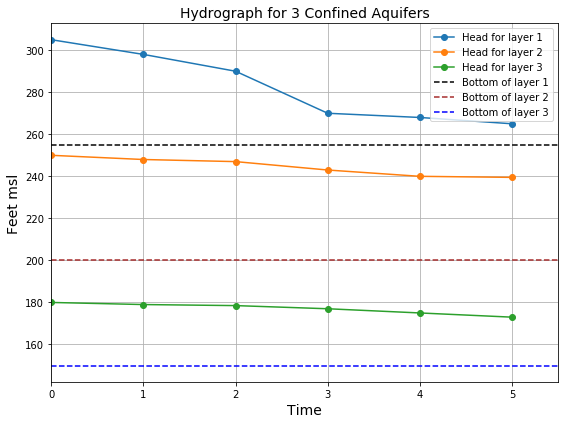

In [3]:
fig, ax = plt.subplots(figsize=(8,6))
for lay in range(len(h)):
    date = np.arange(0,len(h[lay])) 
    ax.plot(date,h[lay],label=f'Head for layer {lay+1}', marker='o')
colors = ['k','brown','b']
for lay in range(3):
    date = np.arange(0, 7)
    ax.plot(date, np.ones(len(date))*z[lay], label=f'Bottom of layer {lay+1}', ls='--', color=colors[lay])

ax.legend()
ax.plot()
ax.set_ylabel('Feet msl', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.grid()
ax.set_title('Hydrograph for 3 Confined Aquifers', fontsize=14)
ax.set_xlim([0,5.5])
fig.tight_layout()

### Initiate model: Give inputs

In [4]:
ml = sub.model(nlay,h,z,Ssk) # number of layers, hydraulic head, thickness, and skeletal specific storage

### Calculate pore fluid pressure values

In [5]:
print(ml.pressure())

[[1030050.  961380.  882900.  686700.  667080.  637650.]
 [ 981000.  961380.  951570.  912330.  882900.  877995.]
 [1765800. 1755990. 1751085. 1736370. 1716750. 1697130.]]


### Calculate change in thickness and NB values

In [6]:
db, nb = ml.db()
db, nb

(array([[0.0385    , 0.0439384 , 0.10974725, 0.01093961, 0.01643578],
        [0.01      , 0.004998  , 0.019992  , 0.01498351, 0.00249675],
        [0.00225   , 0.00112497, 0.0033749 , 0.0044997 , 0.00449953]]),
 array([[ 55.        ,  54.9615    ,  54.9175616 ,  54.80781435,
          54.79687474,  54.78043896],
        [ 50.        ,  49.99      ,  49.985002  ,  49.96501   ,
          49.95002649,  49.94752974],
        [150.        , 149.99775   , 149.99662503, 149.99325013,
         149.98875044, 149.98425091]]))

### Plot each layer's compaction

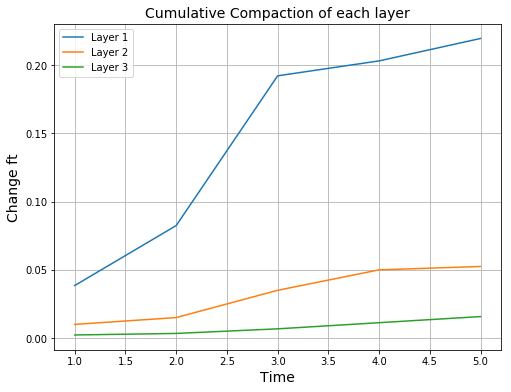

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
ntimes = len(h[0])
for lay in range(nlay):
    ax.plot(np.arange(0,ntimes-1)+1, np.cumsum(db[lay]), label=f'Layer {lay+1}')
ax.legend()
ax.set_ylabel('Change ft', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_title('Cumulative Compaction of each layer', fontsize=14)
ax.grid()

### Plot total subsidence 

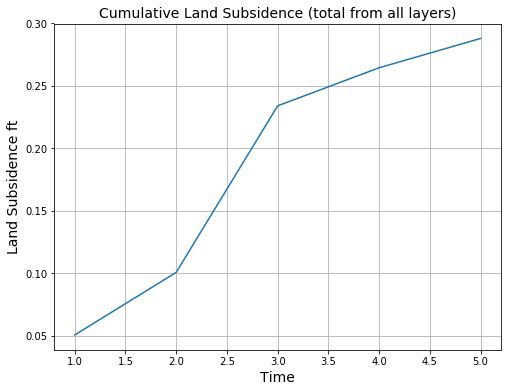

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
ntimes = len(h[0])
landsub = []
for i in range(ntimes-1):
    v = 0
    for lay in range(nlay):
        v += db[lay][i]
    landsub.append(v)
ax.plot(np.arange(0,ntimes-1)+1, np.cumsum(landsub))
ax.set_ylabel('Land Subsidence ft', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_title('Cumulative Land Subsidence (total from all layers)', fontsize=14)
ax.grid()